In [1]:
# Student Name: 김민서(Minseo Kim)
# Student Number: 20205019
# HW1
#Rquired libraries for this HW are shown as Import packages 


In [2]:
# Q1                                BFS

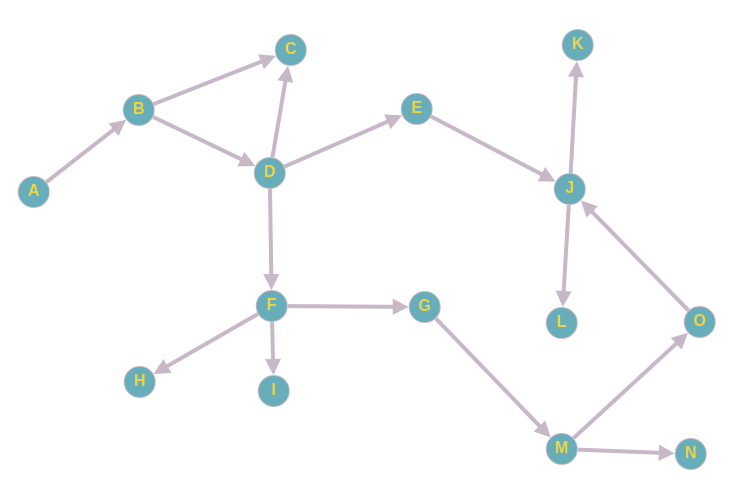

In [3]:
from IPython.core.display import Image, display
display(Image('Assign_BSF_graph.png'))

In [4]:
from queue import Queue
import math


def BFS(graph, start, end=None):
    
    visited = list()
    queue = Queue()
    
    queue.put(start)
    visited.append(start)
    
    parent = dict()
    parent[start] = None
    
    path_found = False
    
    neighbour=None
    while not queue.empty():
        
        current_node = queue.get()
        
        if end is not None:
            if current_node == end:
                path_found = True
                break
        
        for neighbour in graph[current_node]:
            
            if neighbour not in visited:
                queue.put(neighbour)
                
                parent[neighbour] = current_node
                visited.append(neighbour)
                
    # Path reconstruction
    path = []
    if path_found:
        path.append(end)
        while parent[end] is not None:
            path.append(parent[end]) 
            end = parent[end]
        path.reverse()
        return path
    else: return visited

In [5]:
# Directed BFS graph
graph1 = {
    "A" : ["B"],
    "B" : ["C", "D"],
    "C" : [],
    "D" : ["C", "E", "F"],
    "E" : ["J"],
    "F" : ["G", "H", "I"],
    "G" : ["M"],
    "H" : [],
    "I" : [],
    "J" : ["K", "L"],
    "K" : [],
    "L" : [],
    "M" : ["N", "O"],
    "N" : [],
    "O" : ["J"]
}
bfsSearch = BFS(graph1, "A")
print(f"a. Order of nodes explored from A: {bfsSearch}")

#print(f"b. Level of each vertex in BFS output tree: {level}")
depth=dict()
for node in graph1:
    depth[node]=len(BFS(graph1, "A", node))-1
print("b. Level of each vertex in BFS output tree:")
for node in depth:
    print(f"    {node}: {depth[node]}")

bfsPathG = BFS(graph1, "A", "G")
print(f"c. Level of vertex G in BFS output tree: {depth['G']}")

bfsPathK = BFS(graph1, "A", "K")
print(f"d. Shortest path from A to K: {bfsPathK}")


a. Order of nodes explored from A: ['A', 'B', 'C', 'D', 'E', 'F', 'J', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O']
b. Level of each vertex in BFS output tree:
    A: 0
    B: 1
    C: 2
    D: 2
    E: 3
    F: 3
    G: 4
    H: 4
    I: 4
    J: 4
    K: 5
    L: 5
    M: 5
    N: 6
    O: 6
c. Level of vertex G in BFS output tree: 4
d. Shortest path from A to K: ['A', 'B', 'D', 'E', 'J', 'K']


In [6]:
# Q2                                                        DFS

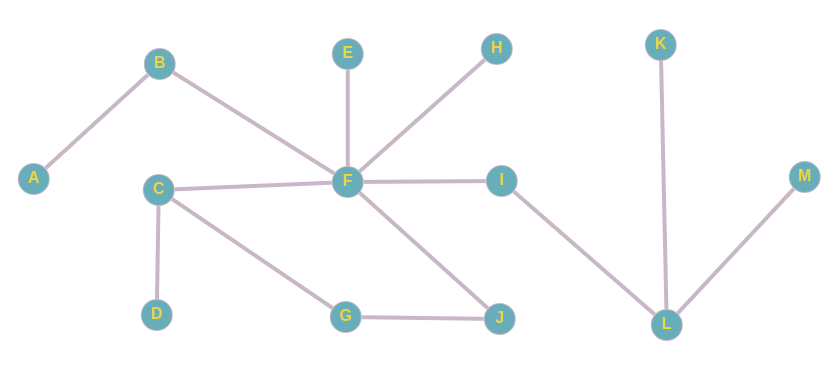

In [7]:
from IPython.core.display import Image, display
display(Image('Assign_DSF_graph.png'))

In [8]:
def DFS(graph, start, end=None):
    visited = list()
    children = list()
    path_found=False
    
        
    children.append(start)
    
    while children:
        current_node = children.pop()
        
        if end is not None:
            if current_node == end:
                path_found = True
                visited.append(end)
                break
        
        
        if current_node not in visited:
            visited.append(current_node)
            children.extend(graph[current_node])
        

    return visited


In [9]:
graph2 = {
    "A" : ["B"],
    "B" : ["A", "F"],
    "C" : ["D", "F", "G"],
    "D" : ["C"],
    "E" : ["F"],
    "F" : ["B", "C", "E", "H", "I", "J"],
    "G" : ["C", "J"],
    "H" : ["F"],
    "I" : ["F", "L"],
    "J" : ["F", "G"],
    "K" : ["L"],
    "L" : ["I", "K", "M"],
    "M" : ["L"]
}


In [10]:
dfsSearch = DFS(graph2, "A")
print(f"a. Order of nodes explored from A: {dfsSearch}")

dfsPath = DFS(graph2, "A", end="K")
print(f"c. Shortest path from A to K: {dfsPath}")

a. Order of nodes explored from A: ['A', 'B', 'F', 'J', 'G', 'C', 'D', 'I', 'L', 'M', 'K', 'H', 'E']
c. Shortest path from A to K: ['A', 'B', 'F', 'J', 'G', 'C', 'D', 'I', 'L', 'M', 'K']


In [11]:
# Q3                                A-Star Algorithm

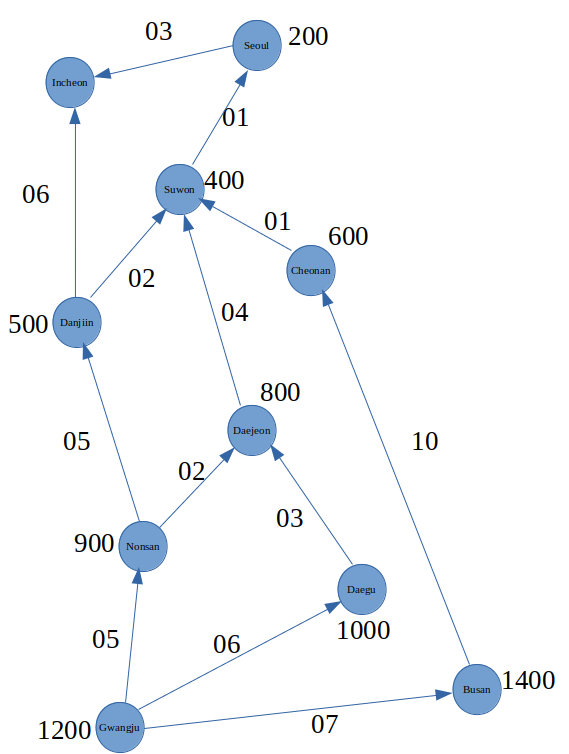

In [12]:
from IPython.core.display import Image, display
display(Image('cities.png'))

In [13]:
"""
    class Graph:
        def __init__(self, Rvalue, Rheuristic):
        self.root = self.Node(Rvalue, Rheuristic)
    
        class Node:
            def __init__(self, value, heuristic):
            self.value = value
            self.heuristic = heuristic
            self.adjacent = []
    
            def add(self, adjacent):
            self.adjacent = adjacent
        
        class Edge:
            def __init__(self, targetNode, actualCost):
                self.targetNode = targetNode
                self.actualCost = actualCost
        
    def A_Star(source, distination):
        return None

"""

'\n    class Graph:\n        def __init__(self, Rvalue, Rheuristic):\n        self.root = self.Node(Rvalue, Rheuristic)\n    \n        class Node:\n            def __init__(self, value, heuristic):\n            self.value = value\n            self.heuristic = heuristic\n            self.adjacent = []\n    \n            def add(self, adjacent):\n            self.adjacent = adjacent\n        \n        class Edge:\n            def __init__(self, targetNode, actualCost):\n                self.targetNode = targetNode\n                self.actualCost = actualCost\n        \n    def A_Star(source, distination):\n        return None\n\n'

In [15]:
class Node:
    def __init__(self, value, heuristic):
        self.value = value
        self.heuristic = heuristic
        self.adjacent = []
    
    def __repr__(self):
        return "{}".format(self.value)
    
    def add(self, adjacent):
        self.adjacent = adjacent
        
        
class Edge:
    def __init__(self, targetNode, actualCost):
        self.targetNode = targetNode
        self.actualCost = actualCost

def A_Star(source, destination):
    """ 
    Following the rule of f(n) = h(n) + g(n), we denote f be the optimal cost. 
    For the implementation, we use openList
    Args:
        source (Node): The source node of the search.
        destination (Node): The goal of the search.

    Returns:
        
        (list): An optimal path to the destination from the source node.
    """
    openList = set([source])
    closedList = set()
    
    while True:
        current = openList.pop()
        if current==destination:
            return None
        
        closedList.add(current)
        for child in current.adjacent:
            if 
    return None

SyntaxError: invalid syntax (3218685540.py, line 41)

In [ ]:
Gwangju = Node("Gwangju", 1200)
Nonsan = Node("Nonsan", 900)
Daejeon = Node("Daejeon", 800)
Daegu = Node("Daegu", 1000)
Busan = Node("Busan", 1400)
Danjiin = Node("Danjiin", 500)
Cheonan = Node("Cheonan", 600)
Suwon = Node("Suwon", 400)
Seoul=Node("Seoul", 200)
Incheon=Node("Incheon", 0)

# All edges in the graph

gwj2ns = Edge(Nonsan, 5)
dg2dj = Edge(Daejeon, 3)
gwj2dg = Edge(Daegu, 6)
gwj2bs = Edge(Busan, 7)
ns2djin = Edge(Danjiin, 5)
ns2dj = Edge(Daejeon, 2)
bs2chn = Edge(Cheonan, 10)
dj2sw = Edge(Suwon, 4)
djin2sw = Edge(Suwon, 2)
chn2sw = Edge(Suwon, 1)
sw2su = Edge(Seoul, 1)
djiin2ich = Edge(Incheon, 6)
su2ich = Edge(Incheon, 3)

# Adjacency list

Gwangju.add([Nonsan, Daegu, Busan])
Daejeon.add([Suwon])
Danjiin.add([Incheon, Suwon])
Cheonan.add([Suwon])
Daegu.add([Daejeon])
Busan.add([Cheonan])
Nonsan.add([Daejeon, Danjiin])
Seoul.add([Incheon])
Suwon.add([Seoul])

In [ ]:
# Q4 3x3 Matrix Agent

In [ ]:
import random